# 단순선형회귀분석

## 회귀분석 이해

In [26]:
# 독립변수(설명변수, 피쳐)와 종속변수간의 인과관계 분석 ==> 회귀계수 ( 독립변수 --> 종속변수)
# 회귀분석 활용 
# 변수간 관게를 설명하거나 예측에 활용
# y = ax + b
# 단순회귀 : 독립변수(x)가 1개 
# 단순회귀 가정 : 선형성 linear (x변수와 y변수간)  f(x1 + x2) = f(x1) + f(x2)  , f(ax) = af(x)

## 데이터 불러오기

In [8]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 출력 가능 코드
from matplotlib import rc
# rc('font', family='AppleGothic') # Mac Os
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows Os
plt.rcParams['axes.unicode_minus'] = False
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore') 

        
path = '../dataset/'

In [9]:
# # CSV 파일로 불러오기
# data = pd.read_csv(f'{path}stat_405701.csv', encoding='cp949')
# data

##### 외부데이터 : 연도별범죄_excel.xlsx

In [10]:
# excel 파일로 불러오기
# 해당 데이터의 값은 연도별 범죄율로 '건수/10만명'의 단위로 구성되어 있다.

# 연도별 범죄
# https://www.index.go.kr/unify/idx-info.do?idxCd=4262

data = pd.read_excel('연도별범죄_excel.xlsx')
data

,통계표명:,형법범죄율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,단위:,건/인구 십만 명당,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,전체 형법범죄,NaN,"1,895","1,997","2,069","2,098","2,003","2,054","1,964","1,867","1,916","2,012","2,015","1,774"
3,주요 형법범죄,살인,2.5,2.4,2.0,1.9,1.8,1.9,1.9,1.7,1.6,1.6,1.6,1.3
4,NaN,강도,8.9,8.1,5.3,4.0,3.2,2.9,2.3,1.9,1.6,1.6,1.3,1.0
5,NaN,성폭력(강간 포함),40.2,44.1,42.5,53.4,58.8,60.9,57.3,63.9,62.2,61.9,58.1,63.6
6,NaN,폭행,221.1,246.9,255.2,250.9,288.9,316.8,336.0,322.2,318.9,312.8,277.0,231.0
7,NaN,절도,540.8,563.8,583.8,576.7,525.7,483.0,397.5,358.9,344.0,362.5,347.4,322.3
8,출처:,"검찰청, 「범죄분석통계」, 통계청, 「장래인구추계」",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,"*자료 : 검찰청, 「범죄분석」 각 연도, 통계청, 「장래인구추계(2020년 기준)」",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 깃허브 : 연도별범죄(수정)_excel.xlsx'

In [11]:
data2 = pd.read_excel('연도별범죄(수정)_excel.xlsx')
data2

,Unnamed: 0,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전체 형법범죄,NaN,"1,895","1,997","2,069","2,098","2,003","2,054","1,964","1,867","1,916","2,012","2,015","1,774"
1,주요 형법범죄,살인,2.5,2.4,2.0,1.9,1.8,1.9,1.9,1.7,1.6,1.6,1.6,1.3
2,NaN,강도,8.9,8.1,5.3,4.0,3.2,2.9,2.3,1.9,1.6,1.6,1.3,1.0
3,NaN,성폭력(강간 포함),40.2,44.1,42.5,53.4,58.8,60.9,57.3,63.9,62.2,61.9,58.1,63.6
4,NaN,폭행,221.1,246.9,255.2,250.9,288.9,316.8,336.0,322.2,318.9,312.8,277.0,231.0
5,NaN,절도,540.8,563.8,583.8,576.7,525.7,483.0,397.5,358.9,344.0,362.5,347.4,322.3


##### 깃허브 : 연도별범죄(수정2)_excel.xlsx'

In [12]:
data3 = pd.read_excel('연도별범죄(수정2)_excel.xlsx',index_col=0)
data3

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
전체형법범죄,"1,895","1,997","2,069","2,098","2,003","2,054","1,964","1,867","1,916","2,012","2,015","1,774"
살인,2.5,2.4,2.0,1.9,1.8,1.9,1.9,1.7,1.6,1.6,1.6,1.3
강도,8.9,8.1,5.3,4.0,3.2,2.9,2.3,1.9,1.6,1.6,1.3,1.0
성폭력(강간 포함),40.2,44.1,42.5,53.4,58.8,60.9,57.3,63.9,62.2,61.9,58.1,63.6
폭행,221.1,246.9,255.2,250.9,288.9,316.8,336.0,322.2,318.9,312.8,277.0,231.0
절도,540.8,563.8,583.8,576.7,525.7,483.0,397.5,358.9,344.0,362.5,347.4,322.3


In [13]:
# 인덱스를 년도로 설정하기
data3 = data3.T
data3

,전체형법범죄,살인,강도,성폭력(강간 포함),폭행,절도
2010,"1,895",2.5,8.9,40.2,221.1,540.8
2011,"1,997",2.4,8.1,44.1,246.9,563.8
2012,"2,069",2.0,5.3,42.5,255.2,583.8
2013,"2,098",1.9,4.0,53.4,250.9,576.7
2014,"2,003",1.8,3.2,58.8,288.9,525.7
2015,"2,054",1.9,2.9,60.9,316.8,483.0
2016,"1,964",1.9,2.3,57.3,336.0,397.5
2017,"1,867",1.7,1.9,63.9,322.2,358.9
2018,"1,916",1.6,1.6,62.2,318.9,344.0
2019,"2,012",1.6,1.6,61.9,312.8,362.5


## 데이터 탐색

In [14]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2010 to 2021
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   전체형법범죄      12 non-null     object
 1   살인          12 non-null     object
 2   강도          12 non-null     object
 3   성폭력(강간 포함)  12 non-null     object
 4   폭행          12 non-null     object
 5   절도          12 non-null     object
dtypes: object(6)
memory usage: 972.0+ bytes


In [15]:
# 데이터프레임 내의 모든 ,와 .를 제거 object를 숫자로 변경하기 위함
for column in data3.columns:
    if data3[column].dtype == 'object':
        data3[column] = data3[column].str.replace(',', '')
        data3[column] = data3[column].str.replace('.', '')

data3 = data3.astype(int)

data3

,전체형법범죄,살인,강도,성폭력(강간 포함),폭행,절도
2010,1895,25,89,402,2211,5408
2011,1997,24,81,441,2469,5638
2012,2069,20,53,425,2552,5838
2013,2098,19,40,534,2509,5767
2014,2003,18,32,588,2889,5257
2015,2054,19,29,609,3168,4830
2016,1964,19,23,573,3360,3975
2017,1867,17,19,639,3222,3589
2018,1916,16,16,622,3189,3440
2019,2012,16,16,619,3128,3625


In [16]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2010 to 2021
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   전체형법범죄      12 non-null     int32
 1   살인          12 non-null     int32
 2   강도          12 non-null     int32
 3   성폭력(강간 포함)  12 non-null     int32
 4   폭행          12 non-null     int32
 5   절도          12 non-null     int32
dtypes: int32(6)
memory usage: 684.0+ bytes


# 파이썬으로 단순회귀분석

*1. Statsmodel 라이브러리

*2. Sklearn 라이브러리

*3. Scipy 라이브러리

## Statsmodel 라이브러리
https://www.statsmodels.org/stable/index.html

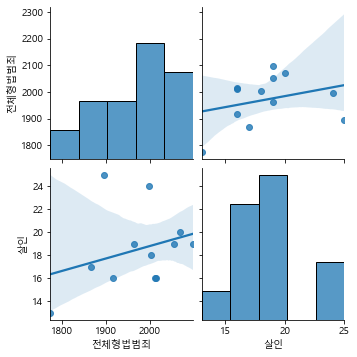

In [25]:
# 분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
# 단순회귀분석을 위해 나이와 범죄건수에 대한 단순회귀분석 모델 구현
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.


# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = data3[['전체형법범죄', '살인']]
# # 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()


In [26]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = data3['전체형법범죄']
feature = data3['살인']

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [27]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전체형법범죄   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9814
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.345
Time:                        14:16:04   Log-Likelihood:                -70.414
No. Observations:                  12   AIC:                             144.8
Df Residuals:                      10   BIC:                             145.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1819.6299    156.170     11.652      0.000    1471.661    2167.599
살인             8.2362      8.314      0.991      0.345     -10.289      26.761
==============================================================================
Omnibus:                        1.261   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.924
Skew:                          -0.429   Prob(JB):                        0.630
Kurtosis:                       1.946   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결정계수 R-squared :  0.08937
constant coef(계수)에 대한 p 값 :  0.00000
feature coef(계수)에 대한 p 값 :  0.34523
잔차의 제곱합 MSE :  8778.69134


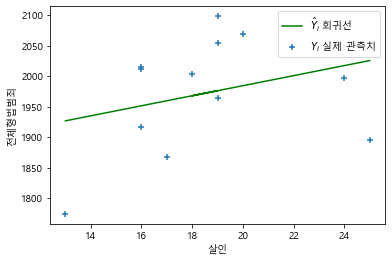

In [28]:
# 통계치 출력
print(f'결정계수 R-squared : {fitted_model.rsquared : .5f}')
print(f'constant coef(계수)에 대한 p 값 : {fitted_model.pvalues[0] : .5f}')
print(f'feature coef(계수)에 대한 p 값 : {fitted_model.pvalues[1] : .5f}')
print(f'잔차의 제곱합 MSE : {fitted_model.mse_resid : .5f}')

# 회귀선 도출
target_pred1 = fitted_model.predict()

plt.scatter(feature, target, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(feature, target_pred1, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.legend()
plt.xlabel('살인')
plt.ylabel('전체형법범죄')
plt.show()

## Sklearn 라이브러리

In [29]:
# sklearn을 활용한 선형회귀선 도출
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(feature_add, target)

target_pred2 = model2.predict(feature_add)


결정계수 R-squared :  0.08937
constant coef(계수):  1819.62992
feature coef(계수) :  8.23622


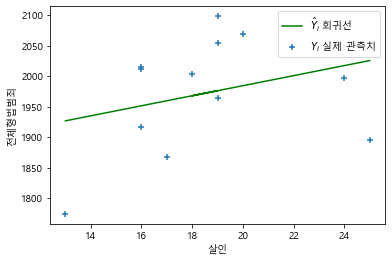

In [30]:
print(f'결정계수 R-squared : {model2.score(feature_add, target) : .5f}')
print(f'constant coef(계수): {model2.intercept_ : .5f}')
print(f'feature coef(계수) : {model2.coef_[1] : .5f}')

plt.scatter(feature, target, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(feature, target_pred2, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.legend()
plt.xlabel('살인')
plt.ylabel('전체형법범죄')
plt.show()

## Scipy 라이브러리

In [31]:
from scipy.stats import linregress

model = linregress(feature, target)

print(f"R-squared : {model.rvalue ** 2 : .5f}")
print(f'constant coef(계수) : {model.intercept : .5f}')
print(f'feature coef(계수) : {model.slope : .5f}')
print(f'feature coef(계수)의 p-value : {model.pvalue : .5f}')

R-squared :  0.08937
constant coef(계수) :  1819.62992
feature coef(계수) :  8.23622
feature coef(계수)의 p-value :  0.34523


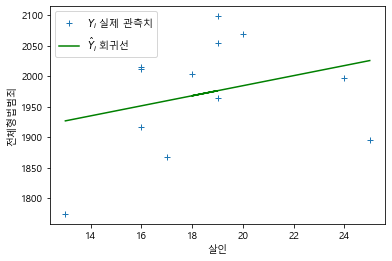

In [32]:
plt.plot(feature, target, '+', label='$Y_i$ 실제 관측치')
plt.plot(feature, model.intercept + model.slope * feature, 'g', label='$\hat{Y}_i$ 회귀선')
plt.xlabel('살인')
plt.ylabel('전체형법범죄')
plt.legend()
plt.show()